# Notebook To Visualize the Results of Gamma Sweep

Authors: 
- Joseph Severino, joseph.severino@nrel.gov
- Juliette Ugirumurera, juliette.ugirumurera@nrel.gov
- Erik Bensen, ebensen@andrew.cmu.edu <ebensen@andrew.cmu.edu>



In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import json

# cf.set_config_file(offline=False, world_readable=True)

# Loading The Results Data

In [3]:
# all of the gamma sweeps data will be stored here. You will be pulling the data from this location.

files = glob.glob("results_*/*/MINRTY/*.csv",recursive=True)

In [5]:
# This code chunk loops through all the results with various models and and various correction terms and appends them into one 
# pandas table and adds their respective model type and correction type to later analysis
dfs = []
for file in files:
    model = file.split("/")[0].split('_')[-1] # extracting model name from file
    loss = file.split("/")[1] #extracting correction name from file
    tmp = pd.read_csv(file)
    tmp['model'] = [model] * tmp.shape[0]
    tmp['loss'] = [loss] * tmp.shape[0]
    dfs.append(tmp)
    
data = pd.concat(dfs)

In [30]:
# Here is a glimpse of the data
data.head()

,gamma,test_mae,test_r2,test_rmse,test_mape,r2_0 0.6,r2_0 0.7,r2_0 0.8,r2_0 0.9,r2_1 0.6,r2_1 0.7,r2_1 0.8,r2_1 0.9,r2 diff 0.6,r2 diff 0.7,r2 diff 0.8,r2 diff 0.9,model,loss
0,0.500000,49.793661,0.873147,98.426632,0.845116,0.920247,0.918408,0.907998,0.905655,0.825727,0.810660,0.693499,0.501051,0.094520,0.107748,0.214499,0.404604,gbt,kendall
0,0.999788,166.375068,0.724174,291.480155,0.801890,0.782418,0.761578,0.752135,0.752448,0.678801,0.665596,0.578671,0.418214,0.103617,0.095982,0.173464,0.334235,gbt,kendall
0,0.000000,50.077992,0.873191,98.483769,0.885394,0.921437,0.919381,0.907931,0.905276,0.824558,0.809697,0.694241,0.506138,0.096878,0.109684,0.213691,0.399138,gbt,kendall
0,0.999744,160.582414,0.737675,283.212987,0.769906,0.791419,0.771730,0.763753,0.765254,0.694752,0.683050,0.600692,0.433282,0.096667,0.088679,0.163061,0.331973,gbt,kendall
0,0.546853,49.871592,0.872982,98.506690,0.869904,0.919628,0.917806,0.908331,0.905924,0.826089,0.811024,0.690528,0.496997,0.093539,0.106782,0.217803,0.408927,gbt,kendall


# Plots Below

## Figure 1. Plots of Gamma vs. R<sup>2<sup>

- Each line is the level or percentile of the demographic group in the data. (e.g. .9 means 90th percentile of that demographic group
- Each column graph is the model (i.e. Random Forsest is rf, gbt is Gradient Boosted Trees, and xgb is Extreme Gradient Boosting)
- Each row graph is the correction term (i.e. Pearson Correlation, Distance, and Kendall's Tau)

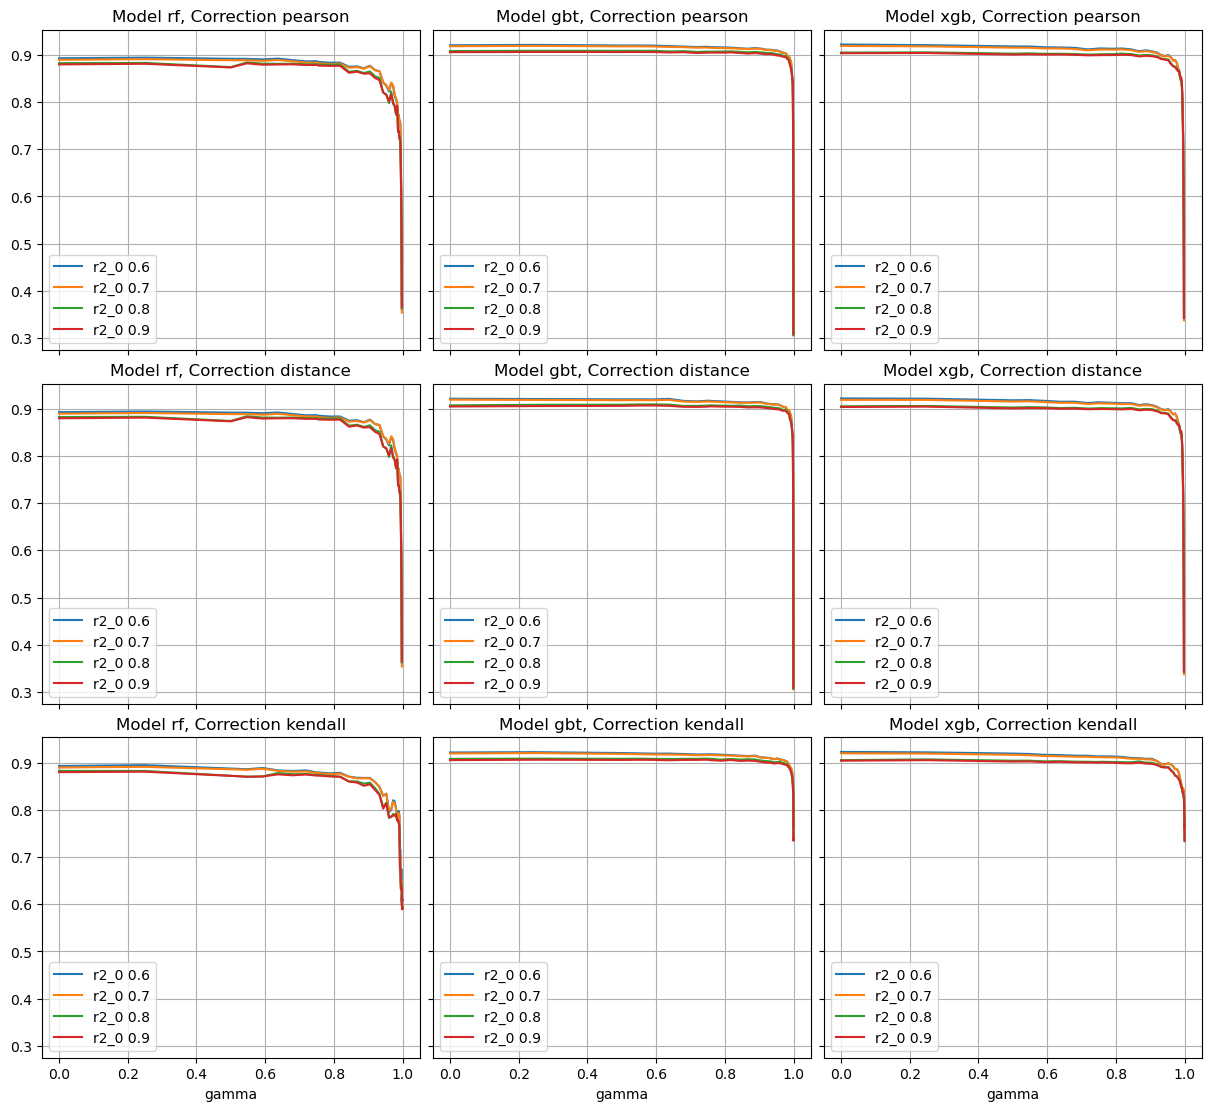

In [6]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, layout="constrained",figsize=(12,11))

models = ['rf','gbt','xgb'] # model types
losses = ['pearson','distance','kendall'] # correction types
for j,loss in enumerate(losses):
    for i,model in enumerate(models):
    
        title = 'Model %s, Correction %s' %(model,loss)
        tmp = data[(data['model']==model) & (data['loss']==loss)]
        # pivot table below transforms data so that index is gamma, values are the different demographic percentiles
        # from .6 to .9 and looking at their perfermance of R^2
        tmp.pivot_table(values=['r2_0 0.6',
       'r2_0 0.7', 'r2_0 0.8', 'r2_0 0.9'],
                        index='gamma').plot(ax=axs[j,i],title=title,grid=True)

## Figure 2. Plots of Gamma vs. R<sup>2</sup> Difference
- Each line is the correction term
- Each row the demographic percentile group. We are only looking at 80th percentile (row one)  and 90th percentile (row two).
- Each column is the model type.



/var/folders/15/gy4vh1d143vgqdtkb11ml0rm4nzrlf/T/ipykernel_30594/291998898.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


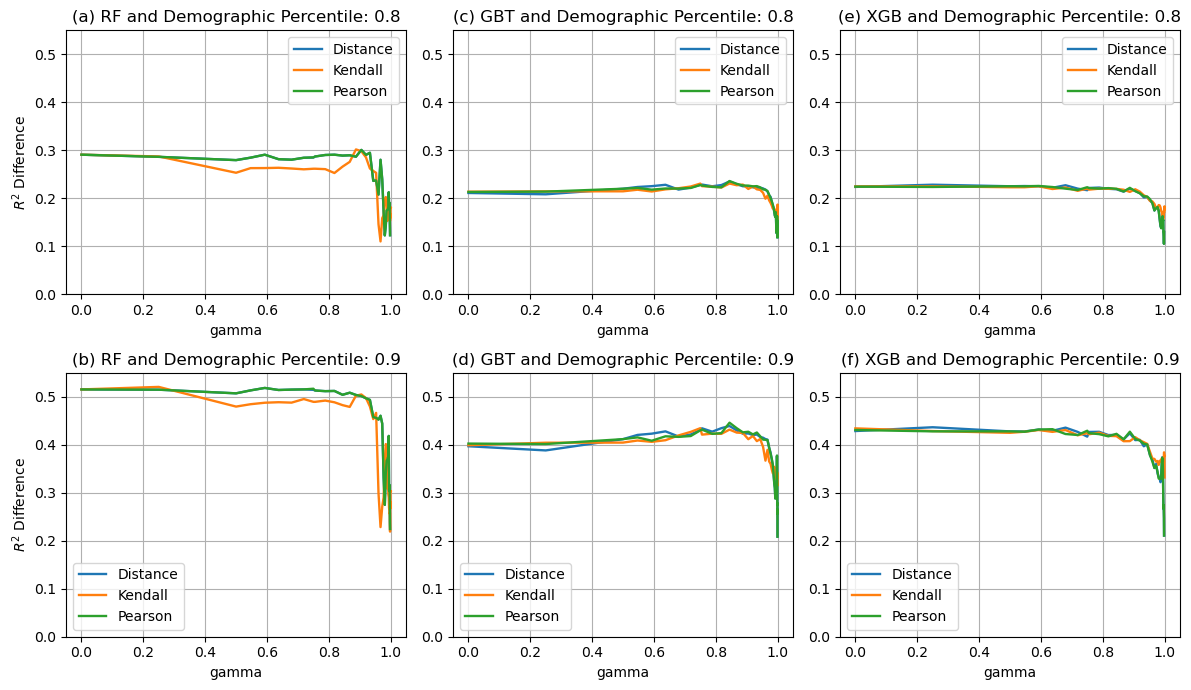

In [31]:
fig, axs = plt.subplots(2, 3, layout="constrained",figsize=(12,7))
import string
string.ascii_lowercase
colors = ['#307abf','#bfa730','#148740'] # these are the colors for the lines
abc = list(string.ascii_lowercase)
models = ['rf','gbt','xgb'] # model types
diffs = [ 'r2 diff 0.8', 'r2 diff 0.9'] # R^2 difference for 80th and 90th percentile demographic
counter = 0 # a counter to track the plot for using a,b,c... title names
for j,model in enumerate(models):
    for i,diff in enumerate(diffs):
        tmp = data[data['model']==model] # dataframe of given model
        # Setting the title for each plot
        title = "(%s) %s and Demographic Percentile: %s" %(abc[counter],model.upper(),diff.split(' ')[-1])
        # pivot table to transform data of given model to columns as the correction terms,
        # values as the two percentile demographic R^2 differences and index as gamma
        tmp.pivot_table(columns = 'loss',values=diff,index='gamma').plot(ax=axs[i,j],
                                                                         title=title,
                                                                         grid=True,
                                                                        ylim=[0,.55],
                                                                        lw=1.7,
                                                                        )
        axs[i,0].set(ylabel="$R^2$ Difference")
        axs[i,j].legend(['Distance','Kendall','Pearson'])
        counter += 1
plt.tight_layout()
plt.savefig("Correction&Dem.png",dpi=1000)

## Figure 3. Plots of Gamma vs. R<sup>2</sup> Difference Zoomed in
- Each line is the correction term
- Each row the demographic percentile group. We are only looking at 80th percentile (row one)  and 90th percentile (row two).
- Each column is the model type.

/var/folders/15/gy4vh1d143vgqdtkb11ml0rm4nzrlf/T/ipykernel_30594/1658888852.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


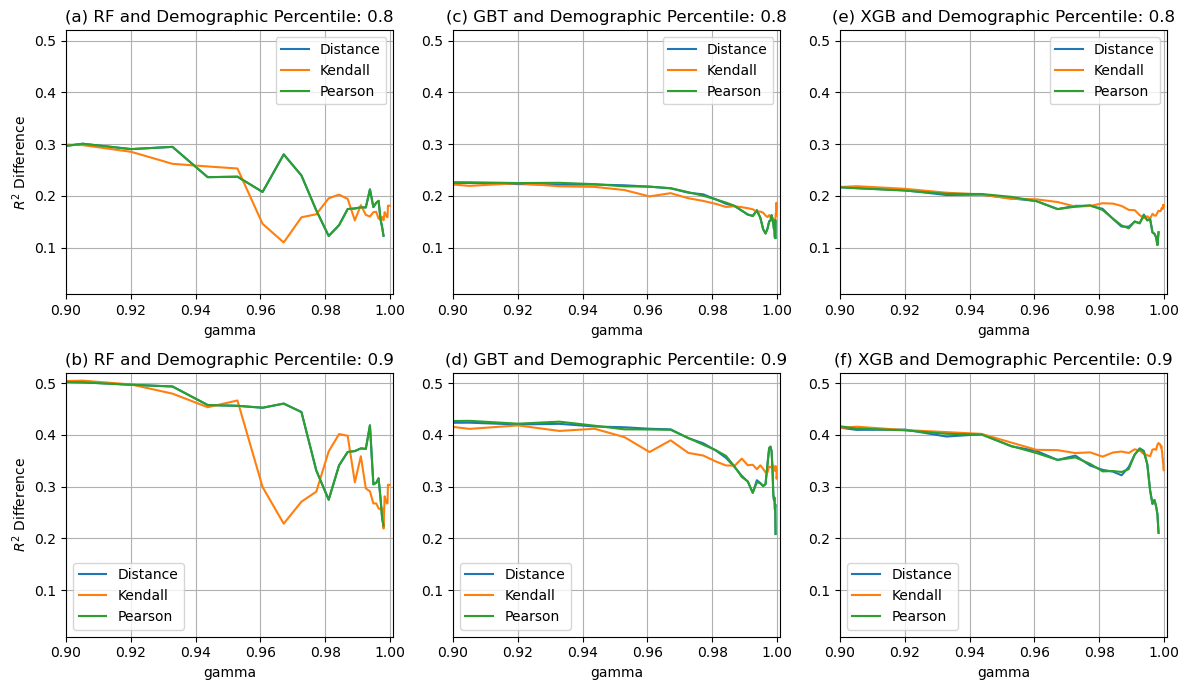

In [34]:
fig, axs = plt.subplots(2, 3, layout="constrained",figsize=(12,7))
import string
string.ascii_lowercase

abc = list(string.ascii_lowercase)
models = ['rf','gbt','xgb'] # model types
diffs = [ 'r2 diff 0.8', 'r2 diff 0.9'] # R^2 differences with 80th and 90th percentile
counter = 0 # used to add a,b,c ... plot titles
for j,model in enumerate(models):
    for i,diff in enumerate(diffs):
        tmp = data[data['model']==model]
        title = "(%s) %s and Demographic Percentile: %s" %(abc[counter],model.upper(),diff.split(' ')[-1])
        # pivot table to transform data so index is gamma values, columns are R^2 differences of 80th and 90th 
        # percentiles. Values are correction terms
        tmp.pivot_table(columns = 'loss',values=diff,index='gamma').plot(ax=axs[i,j],
                                                                         title=title,
                                                                         grid=True,
                                                                        xlim=[.9,1.001],
                                                                        ylim=[.01,.52])
        axs[i,0].set(ylabel="$R^2$ Difference")
        axs[i,j].legend(['Distance','Kendall','Pearson'])
        counter += 1
plt.tight_layout()
plt.savefig("Correction&DemZoom.png",dpi=1000)

## Figure 4. Plots of Gamma vs. R<sup>2</sup> Difference Zoomed in
- Each line is the model type
- Each row the demographic percentile group. We are only looking at 80th percentile (row one)  and 90th percentile (row two).
- Each column is the correction term.

/var/folders/15/gy4vh1d143vgqdtkb11ml0rm4nzrlf/T/ipykernel_30594/603815301.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


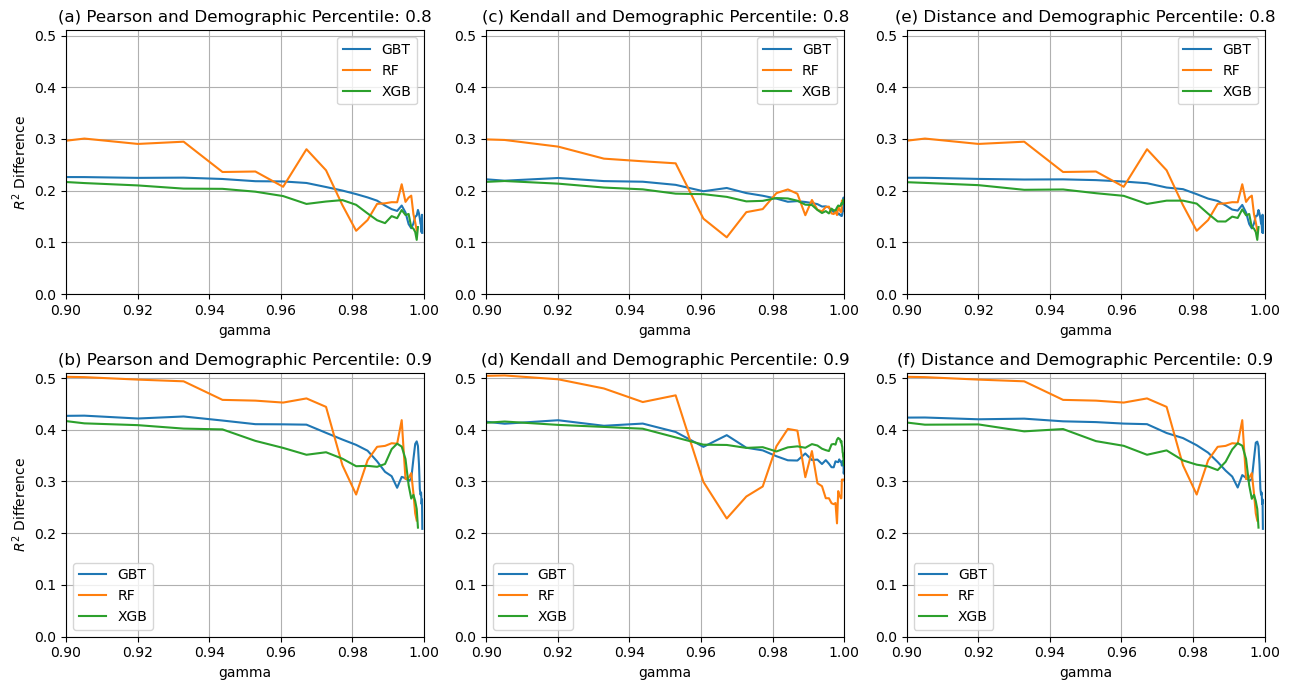

In [35]:
fig, axs = plt.subplots(2, 3, layout="constrained",figsize=(13,7))
string.ascii_lowercase

abc = list(string.ascii_lowercase)
models = ['pearson','kendall','distance'] # correction terms 
diffs = [ 'r2 diff 0.8', 'r2 diff 0.9'] # R^2 differences with 80th and 90th percentile
counter = 0
for j,model in enumerate(models):
    for i,diff in enumerate(diffs):
        tmp = data[data['loss']==model]
        title = "(%s) %s and Demographic Percentile: %s" %(abc[counter],model.capitalize(),diff.split(' ')[-1])
        # pivot table to transform data so that index is gamma, columns are the model types and 
        # values are the R^2 difference of the 80th and 90th percentile demographics 
        tmp.pivot_table(columns = 'model',values=diff,index='gamma').plot(ax=axs[i,j],
                                                                          title=title,
                                                                          grid=True,
                                                                          xlim=[.9,1.0],
                                                                         ylim=[0,.51])
        axs[i,0].set(ylabel="$R^2$ Difference")
        axs[i,j].legend(['GBT','RF','XGB'])
        counter += 1
        
plt.tight_layout()        

## Figure 5. Plots Gamma vs. Test Performance (R<sup>2</sup>)
- Each line is the model type
- Each row is the demographic percentile 80th and 90th
- Each column is the correction term

/var/folders/15/gy4vh1d143vgqdtkb11ml0rm4nzrlf/T/ipykernel_30594/3941031198.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


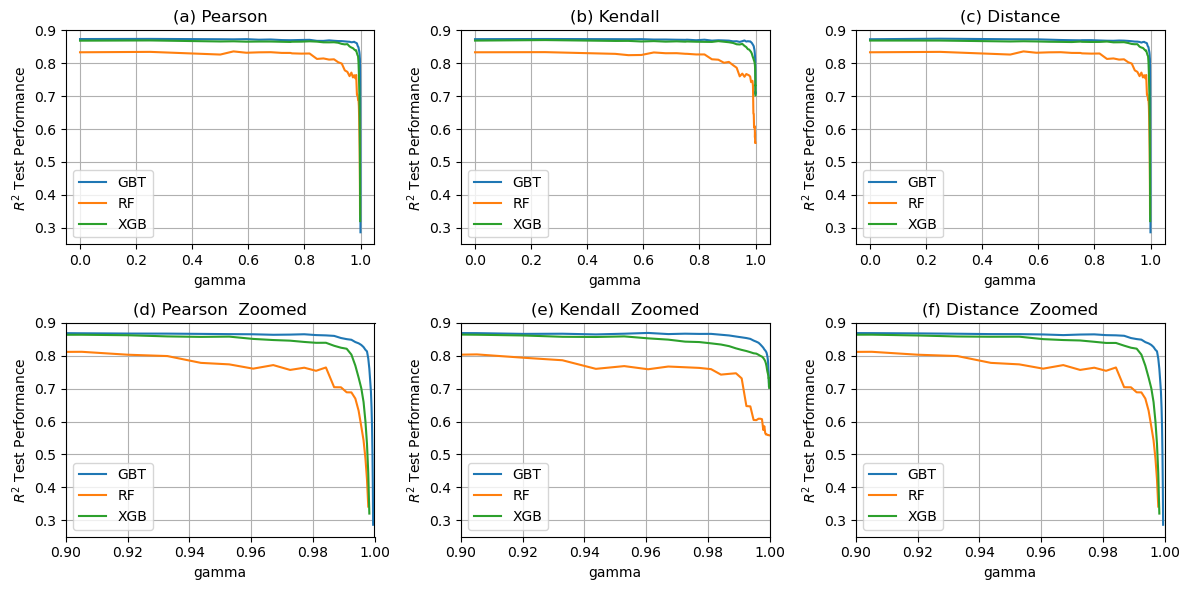

In [36]:
fig, axs = plt.subplots(2, 3, layout="constrained",figsize=(12,6))
string.ascii_lowercase

abc = list(string.ascii_lowercase)
models = ['pearson','kendall','distance'] # correction terms
# diffs = ['r2 diff 0.6', 'r2 diff 0.7', 'r2 diff 0.8', 'r2 diff 0.9']
counter = 0
for j,model in enumerate(models):
   
    tmp = data[data['loss']==model] # filter for model type
    title = "(%s) %s" %(abc[counter],model.capitalize())
    # pivot table to transform data to index gamma,
    # columns as model type,
    # values as test R^2
    g = tmp.pivot_table(columns = 'model',values='test_r2',index='gamma')
    g.columns = [x.upper() for x in g.columns] # capitolizing column names
    g.plot(ax=axs[0,j],title=title,grid=True,
          ylim=[.25,.9]) # setting y limits for better visual
    axs[0,j].set(ylabel="$R^2$ Test Performance ")
    counter += 1
for j,model in enumerate(models):
   
    tmp = data[data['loss']==model] # filter for model type
    title = "(%s) %s  Zoomed" %(abc[counter],model.capitalize())
    # pivot table to transform data to index gamma,
    # columns as model type,
    # values as test R^2
    g = tmp.pivot_table(columns = 'model',values='test_r2',index='gamma')
    g.columns = [x.upper() for x in g.columns]
    g.plot(ax=axs[1,j],
           title=title,
           grid=True,
          xlim=[.9,1], # zooming in here for x limits
          ylim=[.25,.9]) 
    axs[1,j].set(ylabel="$R^2$ Test Performance ")
    counter += 1

plt.tight_layout() 
plt.savefig('PerformanceAll.png',dpi=1000)

# Pulling More data For Analysis
The below data and plots are looking at the model runs for upsampled data of the higher percentile demographics

In [37]:
files = glob.glob("../../../eagle_runs/results_*/*/MINRTY/*.csv",recursive=True) 
# Replace this location if you have variations of the data that you want to look at. This 
dfs = []
for file in files:
    f = file.split("/")[-1]
    # We want to explude any corrupt files. This line of code will only pertain to us, but it will not break you 
    # workflow
    if f in ['gamma_sweeps_0.75.csv','gamma_sweeps.csv','gamma_sweeps_0.25.csv']:
        print(f)
    else:
        model = file.split("/")[4].split('_')[-1]
        loss = file.split("/")[5]
        tmp = pd.read_csv(file)
        tmp['model'] = [model] * tmp.shape[0]
        tmp['loss'] = [loss] * tmp.shape[0]
        dfs.append(tmp)
    
data_ = pd.concat(dfs)

## Figure 6. Plots Comparing Upsampled Models to Original Data Trained Model

/var/folders/15/gy4vh1d143vgqdtkb11ml0rm4nzrlf/T/ipykernel_30594/478064902.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


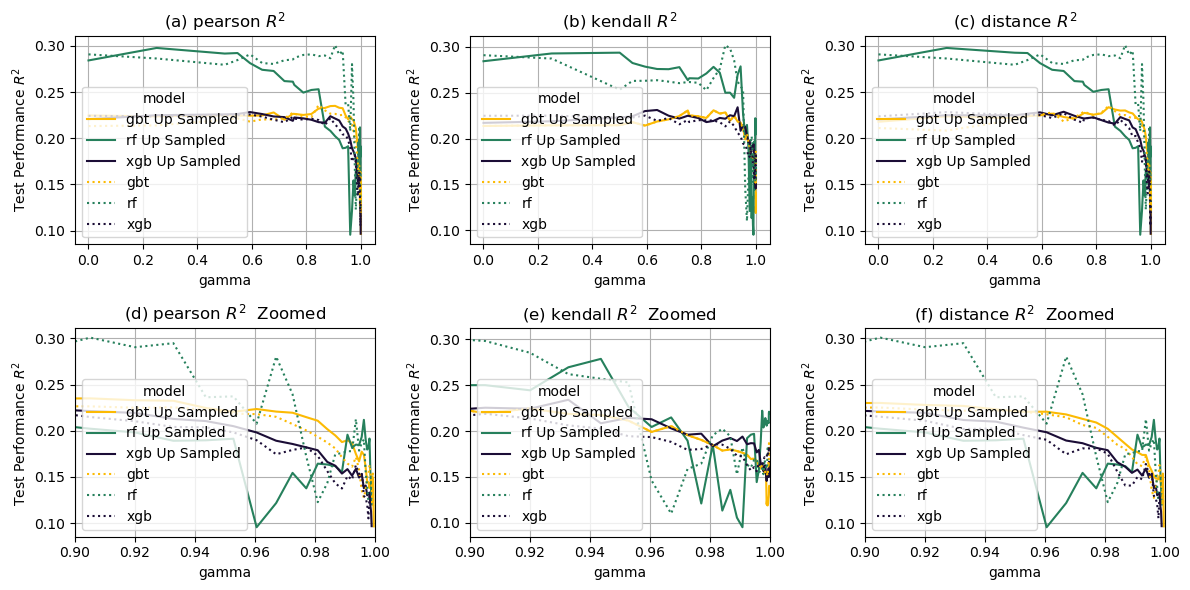

In [20]:
fig, axs = plt.subplots(2, 3, layout="constrained",figsize=(12,6))
string.ascii_lowercase

abc = list(string.ascii_lowercase)
models = ['pearson','kendall','distance']
# diffs = ['r2 diff 0.6', 'r2 diff 0.7', 'r2 diff 0.8', 'r2 diff 0.9']
counter = 0
for j,model in enumerate(models):
   
    tmp = data_[data_['loss']==model]
    tmp2 = data[data['loss']==model]
        

    g1 = tmp.pivot_table(columns = 'model',values='r2 diff 0.8',index='gamma')
    g2 = tmp2.pivot_table(columns = 'model',values='r2 diff 0.8',index='gamma')
    new_columns = ["%s Up Sampled"%(x) for x in g1.columns]
    g1.columns = new_columns
    
    title = "(%s) %s $R^2$" %(abc[counter],model)
    # ploting upsampled and original data. g1 is upsampled data and g2 is original
    g1.plot(ax=axs[0,j],title=title,grid=True,color=['#fcba03','#26805c','#1b0d36'])
    g2.plot(ax=axs[0,j],title=title,grid=True,color=['#fcba03','#26805c','#1b0d36'],
                                                                        linestyle=':')
    
    
    axs[0,j].set(ylabel="Test Performance $R^2$")
    counter += 1
for j,model in enumerate(models):
   
    tmp = data_[data_['loss']==model]
    tmp2 = data[data['loss']==model]
        

    g1 = tmp.pivot_table(columns = 'model',values='r2 diff 0.8',index='gamma')
    g2 = tmp2.pivot_table(columns = 'model',values='r2 diff 0.8',index='gamma')
    new_columns = ["%s Up Sampled"%(x) for x in g1.columns]
    g1.columns = new_columns
    
    title = "(%s) %s $R^2$  Zoomed" %(abc[counter],model)
    g1.plot(ax=axs[1,j],
               title=title,
               grid=True,
              xlim=[.9,1],# Zooming in on x axis for 
              color=['#fcba03','#26805c','#1b0d36'])
    g2.plot(ax=axs[1,j],title=title,
            xlim=[.9,1],
            grid=True,
            color=['#fcba03','#26805c','#1b0d36'],
             linestyle=':')
    
    
    axs[1,j].set(ylabel="Test Performance $R^2$ ")
    counter += 1

plt.tight_layout() 

## Figure 7. Plots of Gamma vs R<sup>2</sup> Difference of the Updampled data and original 

/var/folders/15/gy4vh1d143vgqdtkb11ml0rm4nzrlf/T/ipykernel_30594/870262037.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


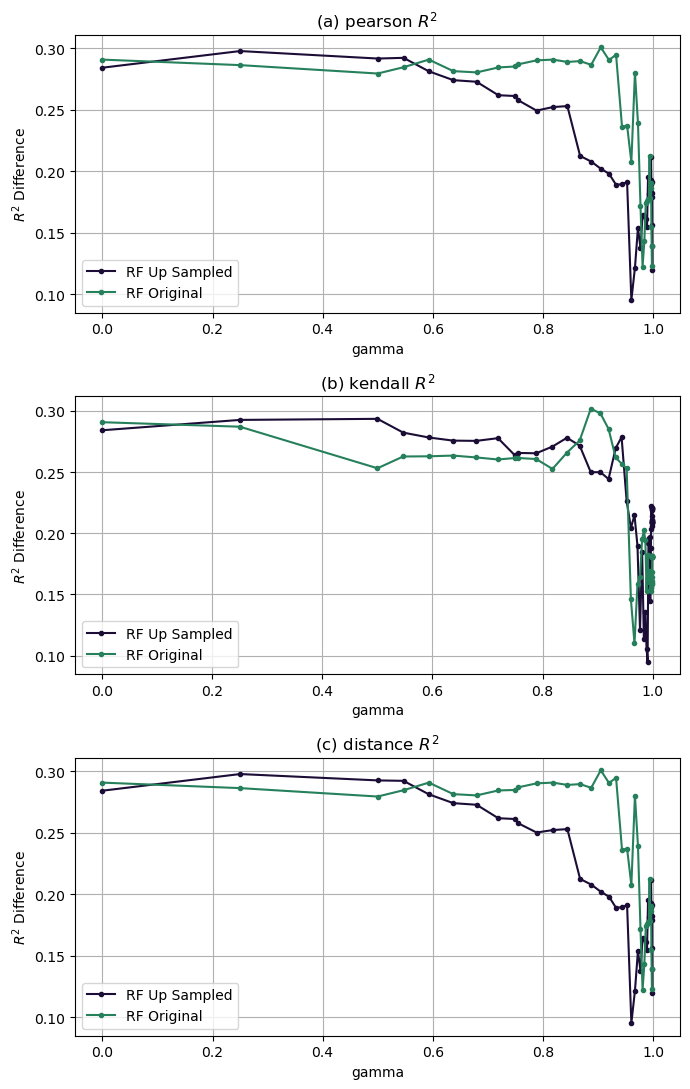

In [38]:
fig, axs = plt.subplots(3, 1, layout="constrained",figsize=(7,11))
string.ascii_lowercase

abc = list(string.ascii_lowercase)
models = ['pearson','kendall','distance']
# diffs = ['r2 diff 0.6', 'r2 diff 0.7', 'r2 diff 0.8', 'r2 diff 0.9']
counter = 0
for j,model in enumerate(models):
   
    tmp = data_[data_['loss']==model]
    tmp2 = data[data['loss']==model]
        
    #g1 is upsampled data and g2 is original data
    g1 = tmp.pivot_table(columns = 'model',values='r2 diff 0.8',index='gamma')[['rf']]
    g2 = tmp2.pivot_table(columns = 'model',values='r2 diff 0.8',index='gamma')[['rf']]
    new_columns = ["%s Up Sampled"%(x.upper()) for x in g1.columns]
    g1.columns = new_columns
    new_columns = ["%s Original"%(x.upper()) for x in g2.columns]
    g2.columns = new_columns
    
    
    title = "(%s) %s $R^2$" %(abc[counter],model)
    g1.plot(ax=axs[j],title=title,grid=True,color=['#1b0d36'],marker='o',
                                                       markersize=3)
    g2.plot(ax=axs[j],title=title,grid=True,color=['#26805c'],
                                                            marker='o',
                                                       markersize=3)
    
    
    axs[j].set(ylabel="$R^2$ Difference")
    counter += 1


plt.tight_layout() 
plt.savefig("Upsampled_vs_Orig.png",dpi=1200)

# Below Plot Looks at Optimal Trade Off off of Bias mitigation and Perfermance Based on Gamma
As you play with the code below, you will need to modify the shaded region v0 and v1 to show the best optimal trade-off. 
The code will not do this for you.

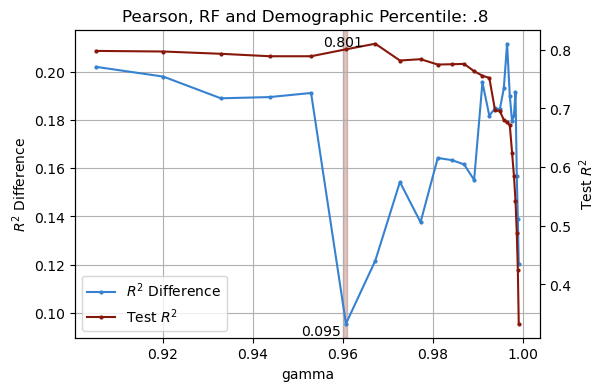

In [39]:
fig, ax1 = plt.subplots(figsize=(6,4))

from matplotlib.lines import Line2D




import string
string.ascii_lowercase

abc = list(string.ascii_lowercase)
model =   'rf'#['gbt','xgb']
diffs =   'r2 diff 0.8'# [ 'r2 diff 0.8', 'r2 diff 0.9'] 
loss = 'pearson' #'distance and kendall

tmp = data_[data_['model']==model]

c1 = '#3682d1' # these are the colors you can set 
c = '#87170b'
custom_lines = [Line2D([0], [0], color=c1, lw=1.5,marker='o',markersize=2),
                Line2D([0], [0], color=c, lw=1.5,marker='o',markersize=2),
            ]

title = "%s, %s and Demographic Percentile: .8 " %(loss.capitalize(),model.upper())
g1 = tmp.pivot_table(columns = 'loss',values=diffs,index='gamma')[loss]
g1 = g1[g1.index>=.9] # only looking at gamma higher or equall to .9
# new_columns = ["%s Up Sampled"%(x) for x in g1.columns]
# g1.columns = new_columns
g1.plot(ax=ax1,
        title=title,
        grid=True,
        color=c1,
       marker='o',lw=1.5,markersize=2,legend=False)
ax2 = ax1.twinx() # this is the other y axis
t1 = tmp.pivot_table(columns='loss',values='test_r2',index='gamma')
g2 = t1[t1.index>=.9][loss]
ax2.set(ylabel="Test $R^2$")
x = g1.index

plt.plot(x,g2,c=c,marker='o',lw=1.5,markersize=2)
plt.legend(custom_lines, ['$R^2$ Difference', 'Test $R^2$'],loc='lower left')
# ax2.plot(x,g2['pearson'],c='#fcba03',linestyle=':')
# ax2.plot(x,g2['distance'],c='#1b0d36',linestyle=':')
                                                                
ax1.set(ylabel="$R^2$ Difference")
# ax1.legend(loc='lower left')
# adjust these for vertical shaded area
v0 = .96
v1 = .961
ax1.axvspan(xmin=v0,xmax=v1,alpha=.25,color=c)


# Below annotates the values of the R^2 difference and the performance R^2
for i, txt in enumerate(g1.index):
    if txt >= v0  and txt <= v1:
        ax1.annotate(round(g1[txt],3), xy=(txt, g1[txt]), xytext=(txt-0.01, g1[txt]-0.005))
        
for i, txt in enumerate(g2.index):
    if txt >= v0  and txt <= v1:
        ax2.annotate(round(g2[txt],3), xy=(txt, g2[txt]), xytext=(txt-.005, g2[txt]+0.005))
        
fig.savefig("upsampled_%s_%s_Opt.png" %(model.upper(),loss.capitalize()), dpi=1200)

# Figure 7. Looking at Performance and Bias As Model Trains High Gamma

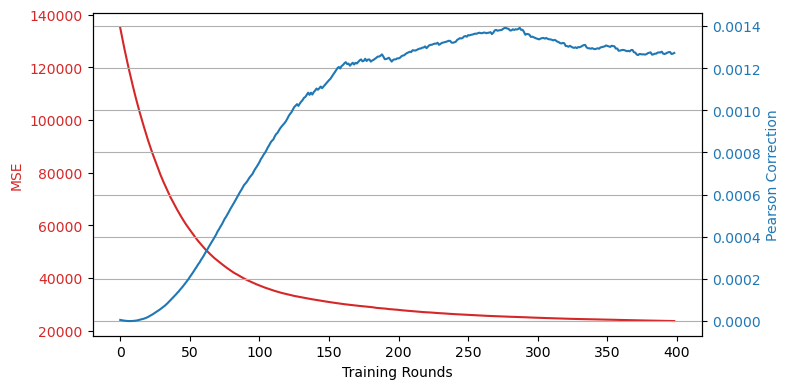

In [25]:
field_names = ['Round', 'MSE', 'R_squared',
               'Avg_gradient_mse', 'Avg_grad_corr','Correction']

# replace file is you want to visualize training data
# May need to reach out to authors if you want help know how to record performanc and bias of model each round
loss2 = pd.read_csv("/Users/jseverin/DataBias/bias_mitigation/loss_function_experimentation/loss_learning_high_gamma.csv")
loss2.columns = field_names
loss2['Round'] = loss2.index



data1 = loss2['MSE']
data2 = loss2['Correction']
t = loss2['Round']
fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:red'
ax1.set_xlabel('Training Rounds')
ax1.set_ylabel('MSE', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pearson Correction', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



fig.savefig('loss_correction_values_high_gamma.png',dpi=900)

# Figure 8. Looking at Performance and Bias As Model Trains 0 Gamma

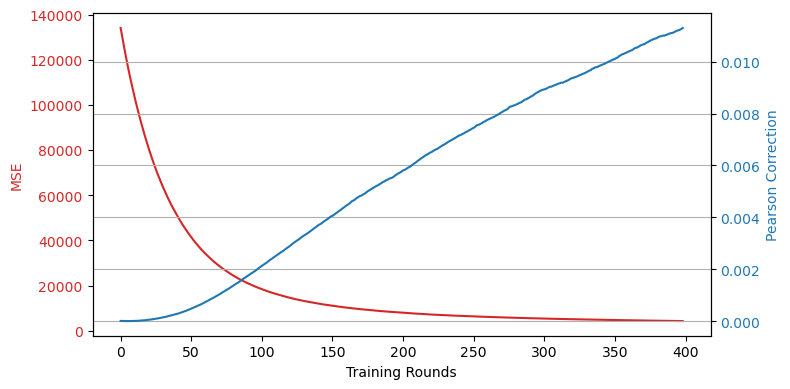

In [41]:

# replace with your training rounds data
loss = pd.read_csv("/Users/jseverin/DataBias/bias_mitigation/loss_function_experimentation/loss_learning.csv")
loss.columns = field_names
loss['Round'] = loss.index



data1 = loss['MSE']
data2 = loss['Correction']
t = loss['Round']
fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:red'
ax1.set_xlabel('Training Rounds')
ax1.set_ylabel('MSE', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pearson Correction', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



fig.savefig('loss_correction_values_0_gamma.png',dpi=900)